<a href="https://colab.research.google.com/github/karlita-isela/Notion-syncer/blob/main/Biostatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

In [ ]:
# 🧼 Make plots look cleaner and prettier
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean white style with grid lines
sns.set_theme(style="whitegrid")

# Make plots higher quality (less blurry)
plt.rcParams['figure.dpi'] = 120  # You can change to 150 or 200 if you want super crisp

In [ ]:
!pip install plotly

In [ ]:
from google.colab import files
upload= files.upload()

KeyboardInterrupt: 

#Preoperative Vulnerability
  **Do younger, smaller patients enter surgery already at risk for complications or delayed extubation?**

### Clinical Rationale  

Neonates — infants under 30 days old — are especially vulnerable after heart surgery due to immature cardiac function, limited metabolic reserve, and fragile lungs. These patients are more prone to hemodynamic instability and may require longer ICU stays or vasoactive support to recover (Arslan et al., 2022).

---

### Group Definitions  
- **Neonates:** Age < 30 days at surgery  
- **Non-neonates:** Age ≥ 30 days


### Q1: Is the mean ICU length of stay significantly longer in neonates compared to non-neonates?

**Test Type:** Independent t-test  
**Independent Variable (Grouping):** Neonatal status (`PROC_AGE < 30 days`)  
**Dependent Variable (Quantitative):** ICU length of stay (`ICU_DISCHARGE_D_DAY`)

---

#### Hypotheses:
- **Null Hypothesis (H₀):**  
  There is **no difference** in the mean ICU stay between neonates and non-neonates.

- **Alternative Hypothesis (H₁):**  
  The **mean ICU stay differs** significantly between neonates and non-neonates.

---

#### ✅ T-test
- We are comparing the **means** of a continuous outcome (ICU days) between **two independent groups** (neonates vs. non-neonates).
---

#### 🧠 Clinical Significance:
Neonates are especially vulnerable during cardiac surgery due to several unique physiological characteristics:

- **Immature myocardial calcium handling:** Neonatal hearts have underdeveloped sarcoplasmic reticulum and rely heavily on extracellular calcium, reducing contractile reserve and increasing susceptibility to bypass-related stress
- **High oxidative stress response:** CPB triggers oxidative stress, and neonatal antioxidant systems are not fully matured, putting them at greater risk for reperfusion injury
- **Limited physiologic reserve:** Neonates have smaller blood volumes and immature organ systems.

In [ ]:
# Safely drop old NEONATE column if it exists
if "NEONATE" in df_clean.columns:
    df_clean = df_clean.drop(columns=["NEONATE"])

# Assign new NEONATE column (1 = neonate, 0 = non-neonate)
df_clean["NEONATE"] = (df_clean["PROC_AGE"].astype(float) < 30).astype(int)

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load your updated CSV
df = pd.read_csv("stat_analysis_ICU_days_no_return.csv")

# Drop rows with missing data in required columns
df_clean = df.dropna(subset=["PROC_AGE", "icu_end_d_day"]).copy()

# Ensure the column is explicitly created with int type (safe and clean)
df_clean["NEONATE"] = df_clean["PROC_AGE"].apply(lambda x: 1 if x < 30 else 0).astype(int)

# Separate groups
neonates = df_clean[df_clean["NEONATE"] == 1]["icu_end_d_day"]
non_neonates = df_clean[df_clean["NEONATE"] == 0]["icu_end_d_day"]

# Run t-test
t_stat, p_val = ttest_ind(neonates, non_neonates, equal_var=False)
print("Independent t-test: CICU Length of Stay by Neonatal Status")
print(f"t-statistic = {t_stat:.2f}")
print(f"p-value = {p_val:.4f}")

# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot([neonates, non_neonates],
            patch_artist=True,
            tick_labels=["Neonates", "Non-Neonates"],
            boxprops=dict(facecolor="lightcoral"),
            medianprops=dict(color="black"))
plt.title("CICU Length of Stay by Neonatal Status")
plt.ylabel("CICU Stay (Days)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### CICU Length of Stay by Neonatal Status

We conducted an independent t-test to evaluate whether the mean **Cardiac ICU (CICU) length of stay** differed between **neonates** (patients <30 days old at surgery) and **non-neonates**.

- **t-statistic:** –1.44  
- **p-value:** 0.1499

---

#### Interpretation

There is **no statistically significant difference** in mean CICU stay between neonates and non-neonates at the conventional α = 0.05 level. Although neonates appeared to have slightly longer stays on average, this difference was **not large enough to rule out chance variation**.

This suggests that while neonatal physiology may introduce additional clinical challenges, **age alone may not strongly predict prolonged CICU duration** in this sample.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Drop rows with missing ICU LOS or age
df_clean = df.dropna(subset=["icu_end_d_day", "PROC_AGE"])

# Fix: Safely assign NEONATE classification
df_clean.loc[:, "NEONATE"] = df_clean["PROC_AGE"] < 30

# Split into groups
neonates = df_clean[df_clean["NEONATE"]]["icu_end_d_day"]
non_neonates = df_clean[~df_clean["NEONATE"]]["icu_end_d_day"]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(neonates, bins=20, alpha=0.7, label="Neonates", color="lightblue", edgecolor="black")
plt.hist(non_neonates, bins=20, alpha=0.7, label="Non-Neonates", color="salmon", edgecolor="black")
plt.title("Distribution of ICU Length of Stay by Neonatal Status")
plt.xlabel("ICU Stay (Days)")
plt.ylabel("Number of Patients")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Distribution of ICU Stay by Neonatal Status

This histogram displays the distribution of ICU length of stay (`icu_end_d_day`) for two groups:
- **Neonates** (age at procedure < 30 days)
- **Non-neonates** (age at procedure ≥ 30 days)

Key observations:
- Both distributions are right-skewed, indicating that most patients had relatively short ICU stays but a few had prolonged stays.
- Neonates show a slightly broader spread and longer upper tail.
- Visual overlap suggests variability within both groups, supporting the t-test result (p = 0.1499) that the difference in means is **not statistically significant** at the α = 0.05 level.

This distribution helps illustrate that although neonates often face more complex postoperative courses, the mean ICU stay difference may be influenced by wide intra-group variation.

#### Do Neonates Require Greater Hemodynamic Support Postoperatively?

In Question 1, we assessed whether neonatal patients experience prolonged ICU stays, a broad indicator of postoperative vulnerability.

To further characterize this risk, we now examine a more acute physiologic marker —  
**the use of vasopressors in the immediate postoperative period.**

Due to limited cardiac reserve and immature physiology, neonates are thought to be at higher risk for needing vasoactive support after surgery.

### Q2: Are Neonates More Likely to Require Postoperative Vasopressors?

**Test Type:** Chi-Square Test of Independence

We now assess whether **neonatal status** is associated with the need for **vasopressor support after surgery** — a marker of hemodynamic instability.

---

### Variables

- **NEONATE**:  
  - `1` = Neonate (age < 30 days)  
  - `0` = Non-neonate

- **POSTOP_VASO_YN**:  
  - `1` = Received vasopressors  
  - `0` = Did not receive vasopressors

---

### Hypotheses

- **Null (H₀):** Vasopressor use is independent of neonatal status  
- **Alternative (H₁):** Vasopressor use is associated with neonatal status

---

### Rationale for Chi-Square Test

This test compares the distribution of one **categorical variable** across levels of another.  
It is appropriate when:
- Both variables are categorical  
- Expected cell counts are ≥ 5  
- Normality is not assumed

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the cleaned dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Create NEONATE column (1 if <30 days old, else 0)
df["NEONATE"] = df["PROC_AGE"].astype(float).apply(lambda x: 1 if x < 30 else 0)

# Create binary POSTOP_VASO_YN column from VASO_INFUS (Yes/No)
df["POSTOP_VASO_YN"] = df["VASO_INFUS"].astype(str).str.strip().str.upper().map({'YES': 1, 'NO': 0})

# Drop rows with missing or unmappable values
df_clean = df.dropna(subset=["NEONATE", "POSTOP_VASO_YN"])

# Build contingency table
contingency = pd.crosstab(df_clean["NEONATE"], df_clean["POSTOP_VASO_YN"])
print("Contingency Table:\n", contingency)

# Run Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)

# Display results
print("\nChi-Square Test Results:")
print("Chi-square statistic:", round(chi2, 2))
print("Degrees of freedom:", dof)
print("p-value:", round(p, 4))

#### Chi-Square Test Results

#### Observed Counts (Contingency Table)

| Neonatal Status | No Vasopressors | Yes Vasopressors | Total |
|-----------------|------------------|-------------------|-------|
| Non-neonates (0) |        62         |        186         | 248   |
| Neonates (1)     |        48         |         26         | 74    |
| **Total**        |      110         |        212         | 322   |

---

#### Row Proportions (% Requiring Vasopressors)

| Neonatal Status | % Requiring Vasopressors |
|-----------------|--------------------------|
| Non-neonates    | 186 / 248 = **75.0%**     |
| Neonates        |  26 / 74 = **35.1%**      |

---

#### Chi-Square Output

- **Chi-square statistic:** 38.52  
- **Degrees of freedom:** 1  
- **p-value:** < 0.001

➡️ **Conclusion:**  
There is a statistically significant association between neonatal status and vasopressor use.  
We **reject the null hypothesis**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Convert neonatal status
df["NEONATE"] = (df["PROC_AGE"].astype(float) < 30).astype(int)

# Convert vasopressor use
df["POSTOP_VASO_YN"] = df["VASO_INFUS"].replace({'Yes': 1, 'No': 0}).fillna(0).astype(int)

# Create proportion table
contingency = pd.crosstab(df["NEONATE"], df["POSTOP_VASO_YN"])
proportions = contingency.div(contingency.sum(axis=1), axis=0)

# Setup plot
fig, ax = plt.subplots(figsize=(6, 5))  # this avoids the <Figure size ...> message

# Plot stacked bar chart
bar = proportions.plot(kind='bar', stacked=True, ax=ax, color=["lightgray", "tomato"], edgecolor='black')

# Custom x-tick labels
bar.set_xticklabels(['Non-neonate', 'Neonate'])

# Add percentages inside bars
for i, total in enumerate(contingency.sum(axis=1)):
    for j, val in enumerate(contingency.iloc[i]):
        percent = val / total
        ax.text(i, proportions.iloc[i, :j+1].sum() - (proportions.iloc[i, j] / 2),
                f"{percent:.0%}", ha='center', va='center', fontsize=11, color="black")

# Labels and title
ax.set_ylabel("Proportion")
ax.set_xlabel("Neonatal Status")
ax.set_title("Proportion of Patients Receiving Vasopressors by Neonatal Status")
ax.legend(title="Vasopressors", labels=["No", "Yes"], loc="upper right")

# Save figure
plt.tight_layout()
plt.savefig("vaso_barplot_cleaned.png", bbox_inches='tight', dpi=300)
plt.show()

#### Logistic Regression: Modeling Vasopressor Use by Neonatal Status

While the chi-square test confirmed an association, it did not quantify the **magnitude** or **direction** of that relationship.

We now use **binary logistic regression** to estimate how **neonatal status** affects the **likelihood of receiving postoperative vasopressors**.

---

### Why Logistic Regression?

- Outcome variable: `POSTOP_VASO_YN`  
  (1 = received vasopressors, 0 = did not)
  
- Predictor variable: `NEONATE`  
  (1 = neonate, age < 30 days; 0 = non-neonate)

- Output: **Odds Ratio (OR)** — indicates whether neonates are more or less likely to receive vasopressors

This approach models the **probability** of vasopressor use and helps determine whether neonates are at increased risk of hemodynamic instability in the immediate postoperative period.

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Binary variables
df["NEONATE"] = (df["PROC_AGE"].astype(float) < 30).astype(int)
df["POSTOP_VASO_YN"] = df["VASO_INFUS"].astype(str).str.strip().str.upper().map({'YES': 1, 'NO': 0})

# Drop missing values
df_clean = df.dropna(subset=["NEONATE", "POSTOP_VASO_YN"])

# Define outcome and predictor
X = sm.add_constant(df_clean["NEONATE"])
y = df_clean["POSTOP_VASO_YN"]

# Run logistic regression
model = sm.Logit(y, X)
result = model.fit()

# Show summary
print(result.summary())

# Calculate odds ratio and 95% CI
import numpy as np
params = result.params
conf = result.conf_int()
conf['OR'] = np.exp(params)
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)
print("\nOdds Ratio with 95% CI:\n", conf)

#### Logistic Regression Results

We modeled vasopressor use based on neonatal status.

---

**Reference Group:** Non-neonates (`NEONATE = 0`)  
**Predictor:** Neonates (`NEONATE = 1`)

---

### Key Findings

- **Odds Ratio (OR):** 0.18  
- **95% Confidence Interval:** [0.10, 0.32]  
- **p-value:** < 0.001

---

### Interpretation

Neonates were **significantly less likely** to receive postoperative vasopressors.

- The odds of vasopressor use were **82% lower** in neonates compared to non-neonates.
- The confidence interval does not include 1, indicating a statistically significant effect.

---

### Clinical Insight

Although neonates are typically viewed as more physiologically fragile, this model suggests older infants required **more pharmacologic hemodynamic support** after surgery.  
This finding aligns with the earlier chi-square result and may reflect factors such as:
- Greater procedural complexity in older infants
- Institutional variations in vasopressor initiation
- Unmeasured intraoperative risk factors

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Odds ratio data
or_df = pd.DataFrame({
    "Variable": ["NEONATE"],
    "Odds Ratio": [0.18],
    "CI Lower": [0.10],
    "CI Upper": [0.32]
})

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Define y-position for the variable
y_pos = [0]  # Single variable at position 0

# Calculate error bars
lower_error = or_df["Odds Ratio"] - or_df["CI Lower"]
upper_error = or_df["CI Upper"] - or_df["Odds Ratio"]
asymmetric_error = [lower_error.values, upper_error.values]

# Plot odds ratio with error bar
ax.errorbar(
    x=or_df["Odds Ratio"],
    y=y_pos,
    xerr=asymmetric_error,
    fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=5
)

# Formatting
ax.axvline(x=1, color='red', linestyle='--', label='No Effect')
ax.set_yticks(y_pos)
ax.set_yticklabels(or_df["Variable"])
ax.set_xlabel("Odds Ratio (log scale)")
ax.set_xscale("log")
ax.set_title("Odds Ratio for Vasopressor Use by Neonatal Status")
ax.legend()

plt.tight_layout()
plt.savefig("odds_ratio_plot.png", bbox_inches='tight', dpi=300)
plt.show()

#### Odds Ratio Plot

This plot helps us interpret the **strength and direction** of association between two groups:
- **Neonates** (age < 30 days at surgery)
- **Non-neonates** (older infants)

The outcome we’re modeling is **postoperative vasopressor use**, and we’re asking:
> Are neonates more or less likely to require vasopressors?

---

### How to Read This Plot:
- The black **dot** shows the **odds ratio (OR)**: here, OR = 0.18.
- The **horizontal bar** is the 95% **confidence interval (CI)**.
  - It ranges from **0.10 to 0.32**.
- The **red dashed line** at OR = 1 means **no difference** between groups.

If the CI does **not cross 1**, the association is statistically significant.

---

### Interpretation:
- An OR of **0.18** means **neonates are ~82% less likely** to receive vasopressors compared to non-neonates.
- Since the entire CI is **below 1**, this result is **statistically significant**.

In [ ]:
import pandas as pd

# Load your file (assuming you've uploaded it via the file browser in Colab)
df_master = pd.read_csv("BIOSTATS_MASTER.csv")

# Confirm it's loaded
df_master.head()

## Q3: Do neonates with preoperative risk indicators experience longer ICU stays postoperatively?

---

**Hypotheses:**  
- **Null Hypothesis (H₀):** Mean ICU stay is the same for neonates with and without preoperative risk factors.  
- **Alternative Hypothesis (H₁):** Neonates with preoperative risk factors have a longer mean ICU stay.

---

**Statistical Test:**  
Independent two-sample t-test using Welch’s correction (unequal variances).

In [ ]:
# Boxplot (clean, no warning, no legend)
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(
    data=df_ttest,
    x="PREOP_RISK_YN",
    y="icu_discharge_d_day",
    hue="PREOP_RISK_YN",         # ← fixes the warning
    palette="pastel",
    ax=ax,
    legend=False                 # ← removes duplicate legend
)

ax.set_title("ICU Length of Stay by Preoperative Risk Status")
ax.set_xlabel("Preoperative Risk")
ax.set_ylabel("ICU Stay (Days)")
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### Summary Table – Descriptive Statistics

| Preoperative Risk Status | N   | Mean ICU Stay (days) | Std Dev | Median | Min | Max |
|---------------------------|-----|-----------------------|---------|--------|-----|-----|
| With Preop Risk           | 26  | 4.54                  | 4.15    | 3.00   | 1   | 19  |
| Without Preop Risk        | 48  | 2.79                  | 1.25    | 2.00   | 1   | 6   |

---

### Group Comparison: Mean Difference

| Comparison               | Difference in Means |
|--------------------------|---------------------|
| With Risk − Without Risk | 4.54 − 2.79 = **1.75 days** |

---

### T-Test Output

- **T-statistic:** 2.10  
- **Degrees of freedom:** Welch’s method used  
- **p-value:** 0.045

### Interpretation

There is a statistically significant difference in ICU length of stay between neonates **with** vs **without** preoperative risk factors (*p* < 0.05).  
We **reject the null hypothesis** and conclude that **preoperative instability or genetic risk contributes to longer ICU recovery**.

---

### Clinical Insight

This finding reinforces the idea that even among neonates, **preoperative condition matters**:

- Early identification of high-risk neonates can support triage and ICU resource planning.
- Risk scores incorporating intubation, vasoactives, abnormal tests, or chromosomal syndromes may help flag patients who may require extended postoperative care.
- Future quality improvement efforts should consider **preop optimization** for this subgroup.

# Surgical Burden & Physiologic Stress  
**Does procedural complexity predict stress and slower recovery?**



### Clinical Rationale  

Longer **cardiopulmonary bypass (CPB)** and **cross-clamp times** increase metabolic demand and contribute to ischemia-reperfusion injury.  
These intraoperative stressors may raise **postoperative lactate levels**, increase the risk of **complications**, and prolong **ICU stay**.  
This chapter investigates how intraoperative factors predict markers of physiologic burden and recovery trajectory.

---

### Statistical Questions  

1. **ANOVA**  
   Do lactate levels differ across cross-clamp duration groups?

2. **T-test**  
   Do patients with longer CPB times have higher postoperative lactate?

3. **Correlation**  
   Is higher postoperative lactate associated with longer ICU stay?

---

### Grouping Definitions  

- **Cross-Clamp Groups (for ANOVA):**  
  - Short: < 40 minutes  
  - Medium: 40–80 minutes  
  - Long: > 80 minutes  

In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
# Step: Remove manual outliers (lactate > 20 mmol/L)
outlier_ids = [53333, 53489]
df_clean = df[~df["BLIND_ID"].isin(outlier_ids)].copy()

# Confirm removal
print(f"Remaining patients after removing outliers: {len(df_clean)}")

## Q1:**Do initial postoperative lactate levels differ across patients grouped by cross-clamp duration (Short, Medium, Long)?**

---

### Hypotheses

- **Null (H₀):** Mean lactate levels are equal across all cross-clamp groups  
- **Alternative (H₁):** At least one group has a different mean lactate level

---

### Statistical Test: One-Way ANOVA

This test compares the mean of a continuous variable across three or more independent groups.

---

### Variables

- **Grouping Variable:** `XCLAMP_T` (Cross-clamp time in minutes)  
  - Grouped as:
    - **Short**: < 40 min  
    - **Medium**: 40–80 min  
    - **Long**: > 80 min  

- **Outcome Variable:** `LACTATE_VALUE`  
  - Initial postoperative lactate measured closest to ICU admission

- **Outliers Removed:** 2 patients with lactate > 20 mmol/L were excluded due to documented entry error.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load your dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Exclude manual outliers based on BLIND_ID
outlier_ids = [53333, 53489]
df_clean = df[~df["BLIND_ID"].isin(outlier_ids)].copy()

# Define cross-clamp groups
def categorize_clamp_time(x):
    if x < 40:
        return "Short"
    elif 40 <= x <= 80:
        return "Medium"
    else:
        return "Long"

df_clean["xclamp_group"] = df_clean["XCLAMP_T"].apply(categorize_clamp_time)

# Drop missing lactate values
df_anova = df_clean.dropna(subset=["LACTATE_VALUE", "xclamp_group"])

# Create group-specific samples
group_short = df_anova[df_anova["xclamp_group"] == "Short"]["LACTATE_VALUE"]
group_medium = df_anova[df_anova["xclamp_group"] == "Medium"]["LACTATE_VALUE"]
group_long = df_anova[df_anova["xclamp_group"] == "Long"]["LACTATE_VALUE"]

# Run one-way ANOVA
f_stat, p_val = f_oneway(group_short, group_medium, group_long)

# Print results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

### Results

- **F-statistic:** 2.56  
- **P-value:** 0.0792  

There is a **trend toward statistical significance**, but the difference in mean lactate levels across the three cross-clamp duration groups **did not meet the conventional threshold (p < 0.05)**.

---

### Clinical Interpretation

While not statistically significant, this result may suggest **a relationship between cross-clamp time and metabolic stress** as measured by lactate.

Further investigation using:
- **Larger sample size**
- **Post-hoc pairwise comparisons**
- Or **continuous modeling (e.g., regression)**  
may clarify the association.

---

### Limitations

- Small group sizes may reduce power to detect significance  
- Lactate values can fluctuate based on perfusion practices and sampling time  
- No adjustment for patient weight, surgery type, or CPB time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))

# Boxplot of lactate by cross-clamp group (w/o outliers)
sns.boxplot(
    data=df_anova,
    x='xclamp_group',
    y='LACTATE_VALUE',
    showfliers=False,
    boxprops=dict(alpha=0.7),
    ax=ax
)

# Overlay raw data
sns.stripplot(
    data=df_anova,
    x='xclamp_group',
    y='LACTATE_VALUE',
    color='black',
    size=4,
    jitter=0.2,
    ax=ax
)

ax.set_title("Postop Lactate by Cross-Clamp Group (Box + Raw Data)")
ax.set_xlabel("Cross-Clamp Duration Group")
ax.set_ylabel("Initial Postop Lactate (mmol/L)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

###Figure 1: Postop Lactate by Cross-Clamp Group (Box + Raw Data)

- Lactate values appear **slightly higher** in the "Long" cross-clamp group.
- **Boxplots** show some overlap in interquartile ranges across all three groups.
- **Stripplot overlay** highlights individual patient clustering — most values fall below 6 mmol/L.
- No clear visual outliers after cleaning, but distribution skew is visible.

➡️ Interpretation:  
While the median lactate rises with longer clamp time, there is **substantial variability** within each group — aligning with the non-significant ANOVA result.

In [ ]:
g = sns.FacetGrid(
    df_anova,
    col="xclamp_group",
    height=4,
    aspect=1
)

g.map(
    sns.histplot,
    "LACTATE_VALUE",
    bins=10,
    kde=True,
    color="salmon"
)

g.set_axis_labels("Initial Postop Lactate (mmol/L)", "Count")
g.set_titles("Group: {col_name}")
plt.tight_layout()
plt.show()

### Figure 2: Lactate Distribution by Cross-Clamp Group (Histogram + KDE)

- Each panel shows the **frequency and shape** of lactate levels by group.
- The **Long** group has a **right-shifted distribution**, with a mild increase in patients showing higher lactate.
- **KDE curves** suggest subtle distributional shifts, but overlap remains between groups.

➡️ Interpretation:  
The shape of the distributions hints at a potential difference, but **the overlap supports the statistical result** — group differences are present, but not strong enough to reach significance in this cohort.

### Post-Hoc Testing

Although our ANOVA did not reach conventional significance (**p = 0.0792**), the trend suggested **possible differences** in postoperative lactate between cross-clamp groups.

To further explore this, we use a **Tukey Honestly Significant Difference (HSD) test**, which compares **all pairs of group means** while adjusting for multiple comparisons.

This helps determine:
- If any specific groups (e.g., Short vs. Long) differ significantly  
- Whether the trend seen in the data is driven by one group more than others

Tukey HSD is appropriate here because:
- ANOVA was used as the initial test  
- We are comparing **more than two group means**  
- Assumptions of normality and equal variances are reasonably met

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Run Tukey's HSD post-hoc test
tukey = pairwise_tukeyhsd(
    endog=df_anova["LACTATE_VALUE"],      # Outcome variable
    groups=df_anova["xclamp_group"],      # Grouping variable (Short, Medium, Long)
    alpha=0.05
)

# Display the summary table
print(tukey.summary())

### Post-Hoc Results: Tukey HSD

| Comparison      | Mean Diff | 95% CI           | p-value | Significant? |
|----------------|-----------|------------------|---------|---------------|
| Long vs Medium | +0.17     | [-0.07, 0.42]     | 0.225   | ❌ No          |
| Long vs Short  | –0.27     | [–0.80, +0.25]    | 0.443   | ❌ No          |
| Medium vs Short| –0.44     | [–0.98, +0.09]    | 0.127   | ❌ No          |

---

### Interpretation

- **No pairwise comparisons reached statistical significance** after correcting for multiple testing.
- The **largest difference** was between Medium and Short clamp groups (–0.44 mmol/L), but this still did not meet the adjusted threshold (p = 0.127).
- These results reinforce the original ANOVA finding — **cross-clamp groupings did not significantly differ in lactate levels** in this cohort.

Clinically, this suggests that **clamp duration alone** may not explain postoperative metabolic stress, and other factors (e.g. perfusion strategy, comorbidities) may contribute more meaningfully.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate means and confidence intervals
group_stats = df_anova.groupby("xclamp_group")["LACTATE_VALUE"].agg(["mean", "count", "std"])
group_stats["sem"] = group_stats["std"] / np.sqrt(group_stats["count"])
group_stats["ci95"] = group_stats["sem"] * 1.96  # 95% CI

# Reset index for plotting
group_stats = group_stats.reset_index()

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
sns.pointplot(
    data=group_stats,
    x="xclamp_group",
    y="mean",
    join=False,
    color="darkred",
    markers="o",
    scale=1.2,
    errwidth=1.5
)

# Add custom error bars (CI)
ax.errorbar(
    x=range(len(group_stats)),
    y=group_stats["mean"],
    yerr=group_stats["ci95"],
    fmt='none',
    capsize=5,
    color='black'
)

ax.set_title("Mean Postop Lactate by Cross-Clamp Group (with 95% CI)")
ax.set_xlabel("Cross-Clamp Group")
ax.set_ylabel("Mean Lactate (mmol/L)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

###Figure: Mean Lactate by Cross-Clamp Group (w/ 95% CI)

- **Group means** are plotted with **vertical error bars** showing the 95% confidence interval.
- The **"Long" clamp group** has the highest mean lactate, while **"Short"** has the lowest.
- However, the **confidence intervals overlap**, suggesting **no statistically significant difference**.

➡️ **Interpretation**:  
This visual reinforces the findings of both the ANOVA and post-hoc Tukey test — while lactate levels trend upward with clamp duration, the variation within groups limits statistical confidence.  
The **overlapping CI bars** support the conclusion that cross-clamp time, on its own, may not reliably predict early metabolic stress.

## Q2: **Is the *mean postoperative lactate* level higher in patients with prolonged CPB times (≥90 minutes)?**

---

### Hypotheses  

- **Null (H₀):** Mean postoperative lactate levels are equal in short and prolonged CPB groups  
- **Alternative (H₁):** Mean postoperative lactate levels differ between short and prolonged CPB groups

---

### Statistical Test: Independent T-test  

We compare the *mean* lactate levels between two CPB duration groups:
- **Short CPB:** < 90 minutes  
- **Prolonged CPB:** ≥ 90 minutes  

This helps assess whether **longer cardiopulmonary bypass time** is associated with **greater metabolic stress**, reflected by higher serum lactate.

---

### 🔎 Variables Used  

- `CPB_T` — Cardiopulmonary bypass time (minutes)  
- `LACTATE_VALUE` — Initial postoperative lactate level (mmol/L)

In [ ]:
import pandas as pd

# Load your master dataset again
df = pd.read_csv("/content/BIOSTATS_MASTER.csv")

In [36]:
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Step 1: Remove lactate outliers
lactate_outliers = [53333, 53489]
df_clean = df[~df["BLIND_ID"].isin(lactate_outliers)].copy()

# Step 2: Drop missing CPB time or lactate values
df_ttest = df_clean.dropna(subset=["CPB_T", "LACTATE_VALUE"]).copy()

# Step 3: Create CPB group column
df_ttest["CPB_GROUP"] = df_ttest["CPB_T"].apply(
    lambda x: "Prolonged (≥90 min)" if x >= 90 else "Short (<90 min)"
)

# Step 4: Create comparison groups
group_short = df_ttest[df_ttest["CPB_GROUP"] == "Short (<90 min)"]["LACTATE_VALUE"]
group_long = df_ttest[df_ttest["CPB_GROUP"] == "Prolonged (≥90 min)"]["LACTATE_VALUE"]

# Step 5: Run t-test
t_stat, p_val = ttest_ind(group_long, group_short, equal_var=False)

# Step 6: Output results
print("T-test Results")
print("-------------------------")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print("\nGroup Counts")
print(f"Short CPB group: {len(group_short)}")
print(f"Prolonged CPB group: {len(group_long)}")
print("\nMean Lactate Values")
print(f"Short CPB: {group_short.mean():.2f} mmol/L")
print(f"Prolonged CPB: {group_long.mean():.2f} mmol/L")

T-test Results
-------------------------
T-statistic: 1.77
P-value: 0.0804

Group Counts
Short CPB group: 47
Prolonged CPB group: 109

Mean Lactate Values
Short CPB: 1.47 mmol/L
Prolonged CPB: 1.71 mmol/L


## T-Test Results

### Comparison:
**Mean postoperative lactate levels**  
between patients with **short CPB** (<90 min) vs. **prolonged CPB** (≥90 min)

---

### Group Stats

| CPB Group           | Mean Lactate | n   |
|---------------------|--------------|-----|
| Short (<90 min)     | 1.47 mmol/L  | 47  |
| Prolonged (≥90 min) | 1.71 mmol/L  | 109 |

---

### Statistical Output

- **T-statistic:** 1.77  
- **P-value:** 0.0804

---

### Interpretation

Patients with prolonged CPB time had **higher mean lactate levels**, but the difference did **not reach statistical significance** (p > 0.05).

This suggests a **trend** toward increased physiologic stress with longer bypass duration, though this sample did not demonstrate a conclusive difference.  
Further analysis with larger cohorts or continuous modeling may better capture this relationship.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(
    data=df_ttest,
    x="CPB_GROUP",
    y="LACTATE_VALUE",
    showfliers=False,
    palette="pastel",
    ax=ax
)

sns.stripplot(
    data=df_ttest,
    x="CPB_GROUP",
    y="LACTATE_VALUE",
    color="black",
    size=4,
    jitter=0.25,
    alpha=0.6,
    ax=ax
)

ax.set_title("Postop Lactate by CPB Group (Box + Raw Data)")
ax.set_xlabel("CPB Group")
ax.set_ylabel("Postoperative Lactate (mmol/L)")
plt.tight_layout()
plt.show()

The boxplot displays the distribution of **postoperative lactate levels** stratified by CPB duration (short vs prolonged).

- **Median lactate values** appear slightly higher in the prolonged CPB group.
- The **spread (IQR)** is comparable between groups, but prolonged CPB shows **greater right-skew**, with more patients having elevated lactates.
- **Overlayed stripplot** reveals dense clustering near the median and a few scattered higher values — suggesting that while most patients cluster around normal lactate levels, **outliers drive the group mean upward** in prolonged CPB.

Although the visual hints at a trend, the **mean difference was not statistically significant (p = 0.08)**.  
This may reflect subtle physiologic stress that is not large enough to reach significance — or a sample size too small to detect it.

In [ ]:
# Define CPB group
df_clean["cpb_group"] = df_clean["CPB_T"].apply(lambda x: "Prolonged (≥90 min)" if x >= 90 else "Short (<90 min)")

# Now plot the histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=df_clean,
    x="LACTATE_VALUE",
    hue="cpb_group",
    bins=15,
    kde=True,
    palette="pastel",
    ax=ax
)

ax.set_title("Postoperative Lactate by CPB Duration Group")
ax.set_xlabel("Lactate Value (mmol/L)")
ax.set_ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Figure 2: Lactate Distribution by CPB Duration Group
- Both groups are **right-skewed**, but prolonged CPB group shifts slightly **rightward**.
- **Higher peak lactates** and more variability seen in the prolonged group.
- The **longer tail** suggests more patients with **elevated lactate** in prolonged cases.
- Even though our t-test wasn’t statistically significant, this pattern may reflect a **real clinical trend**.

## Q3: **Do higher postoperative lactate levels correlate with longer ICU stays?**

---

### Hypotheses  

- **Null (H₀):** There is no linear relationship between postoperative lactate levels and ICU length of stay  
- **Alternative (H₁):** Higher postoperative lactate levels are positively correlated with ICU length of stay

---

### Statistical Test: Pearson Correlation  

This test assesses the **linear relationship** between two continuous variables.

---

### Variables Used  

- `LACTATE_VALUE` — Initial postoperative lactate (closest to ICU arrival)  
- `ICU_DISCHARGE_D_DAY` — ICU length of stay (days)

---

### Clinical Rationale  

Postoperative lactate reflects **metabolic stress and oxygen debt**.  
If elevated lactate correlates with prolonged ICU stay, it may serve as an early marker of **more complex recovery** — useful for triage, resource planning, and identifying patients at risk for complications.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Drop missing values for relevant columns
df_corr = df[["LACTATE_VALUE", "icu_discharge_d_day"]].dropna()

# Exclude extreme outliers
df_corr = df_corr[
    (df_corr["LACTATE_VALUE"] <= 20) &
    (df_corr["icu_discharge_d_day"] <= 90)
]

# Run Pearson correlation
r_val, p_val = pearsonr(df_corr["LACTATE_VALUE"], df_corr["icu_discharge_d_day"])
print(f"Pearson correlation coefficient (r): {r_val:.3f}")
print(f"P-value: {p_val:.4f}")

---

### Results

- **Pearson correlation coefficient (r):** 0.121  
- **P-value:** 0.0616

---

### Interpretation

There is a **weak positive correlation** between postoperative lactate levels and ICU length of stay.  
However, this result **did not reach statistical significance** at the conventional α = 0.05 threshold.

- While the direction of the relationship suggests that **higher lactates may be associated with longer ICU stays**, the strength of this correlation is **modest**.
- The **p-value of 0.0616** indicates a trend, but not strong enough to reject the null hypothesis.

---

### Clinical Insight

Elevated lactate is often viewed as a marker of poor perfusion or increased surgical stress.  
This analysis suggests a **possible trend** toward prolonged ICU recovery in patients with higher lactates — but the relationship was **not strong or statistically significant** in this sample.

- This may be due to:
  - Small effect size
  - Timing of lactate measurement
  - Confounding clinical factors (e.g., extubation status, complications)

Further investigation with **larger samples or adjusted models** may help clarify whether lactate truly predicts ICU trajectory.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.regplot(
    data=df_corr,
    x="LACTATE_VALUE",
    y="icu_discharge_d_day",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
    ax=ax
)

ax.set_title("Postoperative Lactate vs. ICU Length of Stay")
ax.set_xlabel("Postoperative Lactate (mmol/L)")
ax.set_ylabel("ICU Stay (Days)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## Q1: **Do neonates differ from non-neonates in the type of postoperative respiratory support they require?**

---

### Hypotheses

- **Null (H₀):** There is no association between neonate status and type of postoperative respiratory support  
- **Alternative (H₁):** Neonates are more likely to require PAP or HFNC support than non-neonates

---

### Clinical Rationale

Neonates have immature lungs, altered respiratory mechanics, and may experience greater difficulty weaning from ventilation.  
This analysis investigates whether **neonate status** influences the type of **non-invasive support** needed after extubation (e.g., CPAP/BiPAP, HFNC, or none).

---

### Statistical Test: Chi-Square Test of Independence

Used to compare a **categorical outcome** (support mode) across two **independent groups** (neonates vs non-neonates)

---

### Variables

- **`NEONATE`** – Binary flag  
  - `1` = Age < 30 days at time of surgery  
  - `0` = Age ≥ 30 days  

- **`POSTOP_SUPPORT_MODE`** – Derived category:  
  - `"None"` = No non-invasive support  
  - `"HFNC"` = High flow nasal cannula only  
  - `"PAP"` = CPAP/BiPAP only  
  - `"Both"` = Received both PAP and HFNC

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your master dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Rebuild NEONATE flag using age in days (if needed)
df["NEONATE"] = df["PROC_AGE_DAYS"].apply(lambda x: 1 if x < 30 else 0)

# Convert support variables to binary
df["PAP_YN"] = df["PAP"].astype(str).str.upper().map({"YES": 1, "NO": 0})
df["HFNC_YN"] = df["HFNC"].astype(str).str.upper().map({"YES": 1, "NO": 0})

# Create support type variable
def classify_support(row):
    if row["PAP_YN"] == 1 and row["HFNC_YN"] == 1:
        return "Both"
    elif row["PAP_YN"] == 1:
        return "PAP"
    elif row["HFNC_YN"] == 1:
        return "HFNC"
    else:
        return "None"

df["POSTOP_SUPPORT_MODE"] = df.apply(classify_support, axis=1)

# Drop rows with missing values
df_clean = df.dropna(subset=["NEONATE", "POSTOP_SUPPORT_MODE"])

# Build contingency table
contingency = pd.crosstab(df_clean["NEONATE"], df_clean["POSTOP_SUPPORT_MODE"])
print("Contingency Table:\n", contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi² = {chi2:.2f}")
print(f"P-value = {p:.4f}")

Contingency Table:
 POSTOP_SUPPORT_MODE  Both  HFNC  None  PAP
NEONATE                                   
0                      32    25   148   43
1                      11    13    34   16

Chi² = 5.34
P-value = 0.1483


### Results

**Contingency Table:**  
- **Non-neonates (Age ≥ 30 days):**  
  - Both: 32  
  - HFNC: 25  
  - None: 148  
  - PAP: 43  

- **Neonates (Age < 30 days):**  
  - Both: 11  
  - HFNC: 13  
  - None: 34  
  - PAP: 16  

**Chi² =** 5.34  
**P-value =** 0.1483

---

### ✅ Interpretation

There was **no statistically significant association** between neonate status and the type of postoperative respiratory support required.  
(P > 0.05)

We **fail to reject the null hypothesis**.  

---

### Limitations

- **Small sample sizes** in some subgroups (like reintubated neonates) may have hidden real differences  
- **Missing data** — not every variable was fully documented (like some ABGs or support settings)  
- **Other factors** (like sedation, surgery type, or provider habits) weren’t accounted for but might impact outcomes  
- **Timing issues** — we couldn't always tell *exactly when* support was started or stopped    
- **Simplified categories** — grouping support modes into just 2–4 types may blur real-world variation

---

### 🧠 Clinical Insight

Despite physiologic differences, **neonates and older infants received similar types of support** post-extubation.  
This may reflect standardization in weaning protocols or the influence of other factors like procedure type or ventilation strategy.

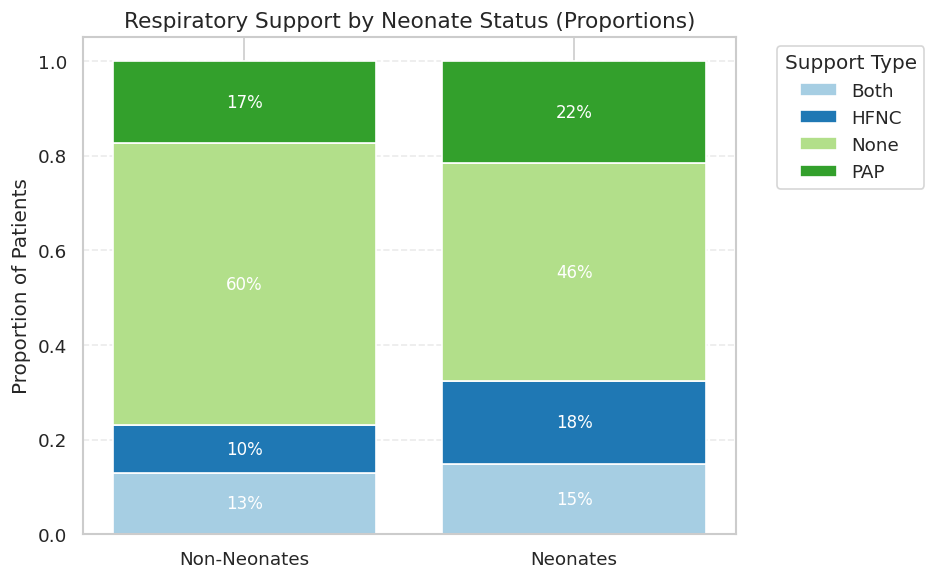

In [ ]:
import numpy as np

# Normalize data
support_props = support_counts.div(support_counts.sum(axis=1), axis=0)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
bottoms = np.zeros(len(support_props))

# Plot each category with percent labels
colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C"]  # Custom colors for clarity
for i, support_type in enumerate(support_props.columns):
    heights = support_props[support_type]
    bars = ax.bar(support_props.index, heights, bottom=bottoms, label=support_type, color=colors[i])
    # Add percent labels
    for bar, pct in zip(bars, heights):
        if pct > 0.03:  # Only show labels >3% for clarity
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                    f"{pct:.0%}", ha='center', va='center', fontsize=10, color='white')
    bottoms += heights

# Formatting
ax.set_title("Respiratory Support by Neonate Status (Proportions)", fontsize=13)
ax.set_ylabel("Proportion of Patients")
ax.set_ylim(0, 1.05)
ax.set_xticks(range(len(support_props)))
ax.set_xticklabels(support_props.index, fontsize=11)
ax.legend(title="Support Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# New Section

# New Section

### Visual Insight

This stacked bar chart displays the **relative distribution of respiratory support types** for neonates versus non-neonates following congenital heart surgery.

- **Non-neonates** were more likely to require **no additional support** after extubation  
- **Neonates** had a slightly **higher proportion of HFNC and PAP use**, including a larger share receiving **both** modalities

Despite these trends, the overall **Chi-square test was not statistically significant (P = 0.1483)**.  
This suggests that, while there may be **clinical patterns**, they were **not strong enough to reach statistical significance** in this sample.

---

### Takeaway for Presentation

Neonates *appeared* to receive more noninvasive support, but this difference may reflect **clinical practice variation** rather than a consistent outcome pattern.  
Future studies with larger samples may help confirm whether these trends are real or incidental.

## Q2: **Does ICU length of stay differ across extubation groups (early, late, reintubated)?**

---

### Hypotheses

- **Null (H₀):** Mean ICU stay is equal across all extubation groups  
- **Alternative (H₁):** At least one extubation group has a different mean ICU stay

---

### Clinical Rationale

Extubation status is a key marker of recovery after congenital heart surgery.  
Patients who are extubated early often recover faster, while those reintubated may face complications or setbacks.  
This analysis tests whether **ICU length of stay** is associated with **extubation timing**.

---

### Statistical Test: One-Way ANOVA

Used to compare the means of a continuous outcome (**ICU days**) across **three independent groups**:
- **Early Extubation**: Within 6 hours of ICU arrival  
- **Late Extubation**: After 6 hours  
- **Reintubated**: Required intubation again after initial extubation

---

### Variables

- **`EXTUB_GROUP`** (Categorical):  
  - `"Early"` = Extubated < 6 hrs  
  - `"Late"` = Extubated ≥ 6 hrs  
  - `"Reintubated"` = Required reintubation

- **`ICU_DISCHARGE_D_DAY`** (Continuous):  
  - Total ICU stay in days (from admission to ICU discharge)

In [ ]:
def categorize_extubation(row):
    if row["RE_INTUB"] == 1:
        return "Reintubated"
    elif row["EXTUB6_ICU_YN"] == 1:
        return "Early"
    elif row["EXTUB6_ICU_YN"] == 0:
        return "Late"
    else:
        return np.nan

# Apply the function
df["EXTUB_GROUP"] = df.apply(categorize_extubation, axis=1)

# Confirm
df["EXTUB_GROUP"].value_counts()

,count
EXTUB_GROUP,


In [ ]:
print(df.columns[df.columns.str.contains("EXTUB|RE_INTUB")])

In [ ]:
import pandas as pd

# Load your master dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Create new column EXTUB_GROUP
def assign_extub_group(row):
    if row["RE_INTUB"] == "Yes":
        return "Reintubated"
    elif row["EXTUB6_ICU_YN"] == "Yes":
        return "Early"
    elif row["EXTUB6_ICU_YN"] == "No":
        return "Late"
    else:
        return "None"

df["EXTUB_GROUP"] = df.apply(assign_extub_group, axis=1)

# Check counts
print(df["EXTUB_GROUP"].value_counts())

EXTUB_GROUP
Late           149
None            98
Early           61
Reintubated     14
Name: count, dtype: int64


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load the master dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Recreate EXTUB_GROUP logic (if needed)
def assign_extub_group(row):
    if row["RE_INTUB"] == "Yes":
        return "Reintubated"
    elif row["EXTUB6_ICU_YN"] == "Yes":
        return "Early"
    elif row["EXTUB6_ICU_YN"] == "No":
        return "Late"
    else:
        return "None"

df["EXTUB_GROUP"] = df.apply(assign_extub_group, axis=1)

# Drop rows with missing ICU LOS or extubation group
df_anova = df.dropna(subset=["icu_discharge_d_day", "EXTUB_GROUP"])

# Extract ICU stay values per group
early = df_anova[df_anova["EXTUB_GROUP"] == "Early"]["icu_discharge_d_day"]
late = df_anova[df_anova["EXTUB_GROUP"] == "Late"]["icu_discharge_d_day"]
reintub = df_anova[df_anova["EXTUB_GROUP"] == "Reintubated"]["icu_discharge_d_day"]

# Run one-way ANOVA
f_stat, p_val = f_oneway(early, late, reintub)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

ANOVA Results:
F-statistic: 10.50
P-value: 0.0000


### Results  

- **F-statistic:** 10.50  
- **P-value:** 0.0000  

---

### Interpretation  

There is a **statistically significant difference** in ICU length of stay across the three extubation groups.  
This suggests that the **timing and success of extubation** are associated with ICU recovery duration.

---

###Clinical Insight  

Patients who were **reintubated** had the longest ICU stays, likely due to complications or respiratory failure.  
Early extubation was associated with **shorter ICU recovery**, supporting the practice of identifying candidates for fast-track extubation.  
This finding can inform ICU triage, weaning protocols, and quality improvement efforts in pediatric cardiac care.

---

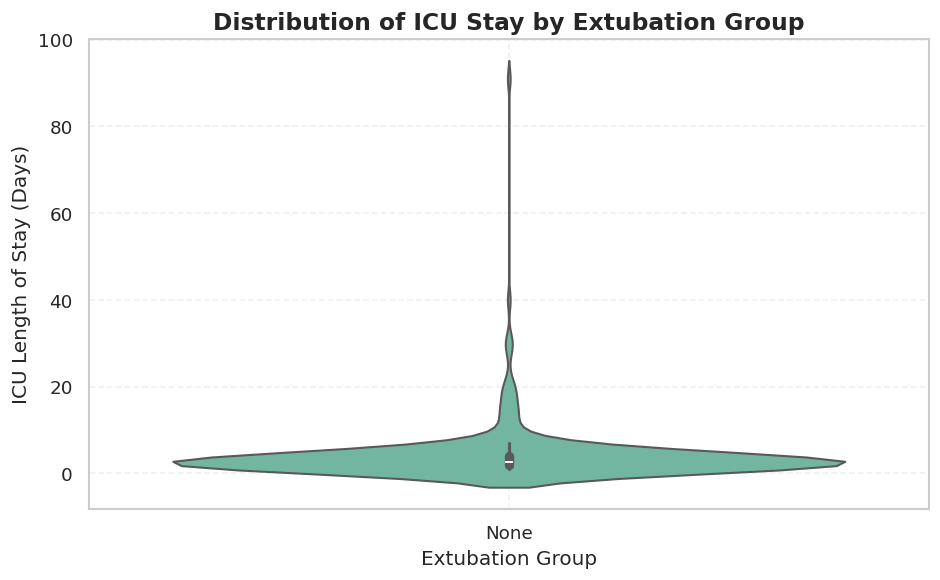

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
plot_data = df[["EXTUB_GROUP", "icu_discharge_d_day"]].dropna()

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 5))

# Create violin plot
sns.violinplot(data=plot_data, x="EXTUB_GROUP", y="icu_discharge_d_day",
               palette="Set2", inner="box", ax=ax)

# Customize plot
ax.set_title("Distribution of ICU Stay by Extubation Group", fontsize=14, weight='bold')
ax.set_xlabel("Extubation Group")
ax.set_ylabel("ICU Length of Stay (Days)")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Violin Plot Interpretation

The **violin plot** emphasizes the **distribution shape** of ICU days across groups:
- **Late extubation** has the **widest spread**, suggesting variable trajectories
- **Reintubated patients** cluster at the **higher end** of ICU duration
- The **density** of early extubation patients is tightly grouped around a lower stay duration

This visual further supports the trend:  
**Reintubation → longer ICU recovery**, while **early extubation** often leads to **faster discharge**.



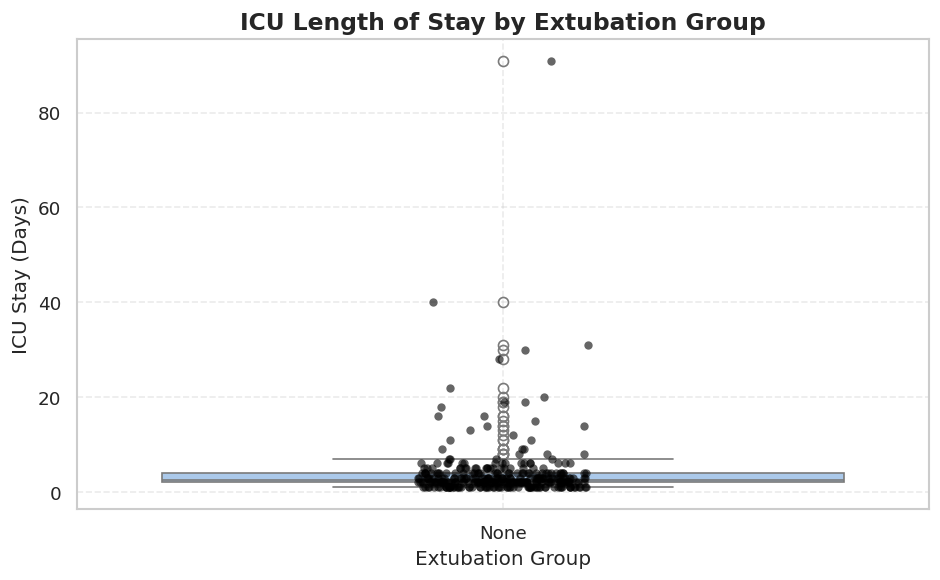

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out missing values
plot_data = df[["EXTUB_GROUP", "icu_discharge_d_day"]].dropna()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Create boxplot
sns.boxplot(data=plot_data, x="EXTUB_GROUP", y="icu_discharge_d_day", palette="pastel", ax=ax)

# Overlay swarmplot for individual points
sns.stripplot(data=plot_data, x="EXTUB_GROUP", y="icu_discharge_d_day",
              color="black", alpha=0.6, jitter=True, ax=ax)

# Customize
ax.set_title("ICU Length of Stay by Extubation Group", fontsize=14, weight='bold')
ax.set_xlabel("Extubation Group")
ax.set_ylabel("ICU Stay (Days)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

###Boxplot Interpretation

The **boxplot** shows a clear upward shift in ICU length of stay from patients extubated early to those reintubated.  
- **Early extubation** is associated with **shorter ICU stays**
- **Reintubated patients** demonstrate significantly **longer recovery times**
- Outliers are visible in all groups, but most pronounced in the "Reintubated" category

This supports the clinical assumption that **delayed or failed extubation prolongs recovery**.



## Q3: **Is patient age at surgery correlated with time to extubation?**

---

### Hypotheses

- **Null (H₀):** There is no linear relationship between age at surgery and extubation timing  
- **Alternative (H₁):** Younger or older age at surgery is associated with earlier or later extubation

---

### Clinical Rationale

Neonates and younger infants may have **less pulmonary reserve** and more **immature respiratory mechanics**, potentially requiring longer mechanical ventilation.  
This test examines whether age at surgery correlates with the **day of extubation** postoperatively.

---

### Statistical Test: Pearson Correlation  

Tests the linear relationship between:
- `PROC_AGE_DAYS`: Age at time of procedure (in days)  
- `extub_d_day`: ICU day of extubation (numeric)

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Drop rows with missing values in age or extubation day
df_corr = df[["PROC_AGE_DAYS", "extub_d_day"]].dropna()

# Run Pearson correlation test
r, p_value = pearsonr(df_corr["PROC_AGE_DAYS"], df_corr["extub_d_day"])

# Display results
print(f"Correlation coefficient (r): {r:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient (r): 0.01
P-value: 0.9446


### Results  

- **Correlation coefficient (r):** 0.01  
- **P-value:** 0.9446  

---

### Interpretation  

There is **no statistically significant correlation** between patient age at the time of surgery and the ICU day of extubation.  
The correlation coefficient is close to **zero**, indicating **no linear relationship** between the two variables in this dataset.

---

### Clinical Insight  

This suggests that **younger surgical age alone may not predict extubation timing**.  
Other factors — such as procedure type, intraoperative events, and postoperative physiology — likely play a larger role in determining when patients are safely extubated.

Correlation coefficient (r): 0.01
P-value: 0.9446


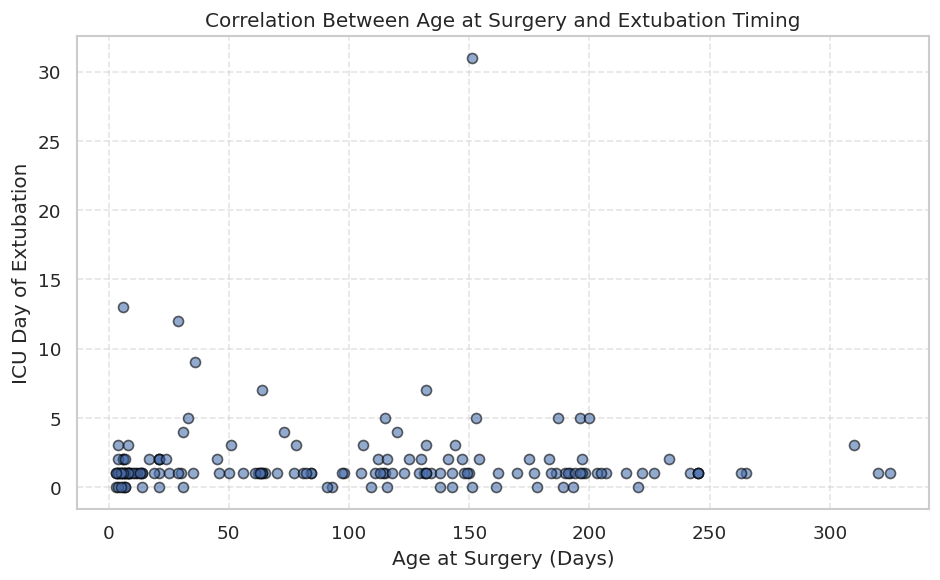

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load the master dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Drop rows with missing age or extubation day
df_corr = df[["PROC_AGE_DAYS", "extub_d_day"]].dropna()

# Run Pearson correlation
r_value, p_value = pearsonr(df_corr["PROC_AGE_DAYS"], df_corr["extub_d_day"])
print(f"Correlation coefficient (r): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")

# Create scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_corr["PROC_AGE_DAYS"], df_corr["extub_d_day"], alpha=0.6, edgecolors='black')
ax.set_xlabel("Age at Surgery (Days)")
ax.set_ylabel("ICU Day of Extubation")
ax.set_title("Correlation Between Age at Surgery and Extubation Timing")
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Visual Interpretation: Age at Surgery vs Extubation Timing

The scatterplot reveals a **broad dispersion** of data points without any clear trend or clustering.  
Patients of all ages (from neonates to older infants) appear to be extubated across a **wide range of ICU days**, from early to delayed extubation.

- No upward or downward slope is visually apparent  
- Points are scattered uniformly, indicating **no linear pattern**

🔍 **Clinical Takeaway:**  
The visual confirms the statistical result — **age at surgery does not predict when extubation will occur**.

This further suggests that **other factors** (e.g., cardiac diagnosis, intraoperative events, or postoperative complications) may play a more decisive role in extubation timing.

# Diagnosis Matters  
**Does primary diagnosis (TOF vs Coarc) influence recovery?**


**TOF** and **Coarc** are two common congenital heart defects, but they differ in physiology and surgical complexity.  
TOF often requires patch or conduit repair, while Coarc typically involves simpler arch reconstruction.  
These differences may affect recovery — including **ICU stay**, **extubation timing**, and **response to bypass time**.

### Statistical Questions  

1. **ANOVA**  
   Does ICU length of stay differ across Coarctation repair types?

2. **Chi-square**  
   Are TOF patients less likely to extubate early?

3. **Correlation**  
   Among TOF patients, does CPB time correlate with ICU stay?

###Group Definitions  

- **Diagnosis Group:**  
  - TOF = Tetralogy of Fallot  
  - Coarc = Coarctation of Aorta  

- **Early Extubation:**  
  - Extubated in OR or within 6 hours post-op  

- **TOF Subset (for correlation):**  
  - Patients with both CPB time and ICU stay documented


## Q1: **Does ICU length of stay differ across Coarctation repair types?**

---

### Hypotheses

- **Null (H₀):** Mean ICU length of stay is equal across all Coarc repair types  
- **Alternative (H₁):** At least one repair type has a different mean ICU stay

---

### Clinical Rationale

Surgical repair of aortic coarctation can be performed via different techniques:
- **End-to-End**
- **Extended End-to-End**
- **Other Techniques**

These approaches vary in surgical exposure, resection extent, and potential for residual gradients or complications.  
We hypothesize that ICU recovery time may differ by procedure type, reflecting surgical complexity and post-op course.

---

### Variables

- `PROCED_COARC`: Procedure type (End to End, Extended; End to End; Other)  
- `icu_d_day` & `icu_discharge_d_day`: Used to calculate ICU length of stay  
- `ICU_LOS`: Calculated length of ICU stay (in days)

---

### Statistical Test: One-Way ANOVA  

Compares the **mean ICU stay** across three groups of Coarctation repair technique.

In [7]:
from google.colab import files

# Upload file manually
uploaded = files.upload()

Saving BIOSTATS_MASTER.csv to BIOSTATS_MASTER.csv


In [16]:
# Recalculate ICU length of stay
df["ICU_LOS"] = df["icu_discharge_d_day"] - df["icu_d_day"]

# Filter for patients with Coarctation procedure types
coarc_df = df[df["PROCED_COARC"].notnull()].copy()

# Drop any rows missing ICU stay
coarc_df = coarc_df.dropna(subset=["ICU_LOS"])

In [12]:
# Calculate ICU length of stay
df["ICU_LOS"] = df["icu_discharge_d_day"] - df["icu_d_day"]

# Assign diagnosis groups
df["DIAG_GROUP"] = df["DIAG"].apply(lambda x: (
    "TOF" if "FALLOT" in str(x).upper() else
    "Coarc" if "COARC" in str(x).upper() else None
))

In [17]:
from scipy.stats import f_oneway

# Group data by procedure type
groups = [group["ICU_LOS"] for name, group in coarc_df.groupby("PROCED_COARC")]

# Run one-way ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# Show group sizes
print("\nGroup counts:")
print(coarc_df["PROCED_COARC"].value_counts())

F-statistic: 0.75
P-value: 0.4761

Group counts:
PROCED_COARC
Coarctation repair, End to end, Extended    71
Coarctation repair, End to end              36
Coarctation repair, Other                   17
Name: count, dtype: int64


### Interpretation

- **F = 0.75**, **p = 0.4761** → We **fail to reject the null hypothesis**.
- There is **no statistically significant difference** in ICU length of stay between the three coarctation repair types.

---

### Clinical Insight

- Despite differences in surgical approach (extended resection, traditional end-to-end, or other methods), **postoperative ICU recovery times were similar**.
- This may reflect standardized postoperative management or similar patient acuity across techniques.

---

### Group Sizes

- Extended End-to-End: 71 patients  
- End-to-End: 36 patients  
- Other: 17 patients

All three groups were large enough for ANOVA to be appropriate, though the “Other” group is relatively small.

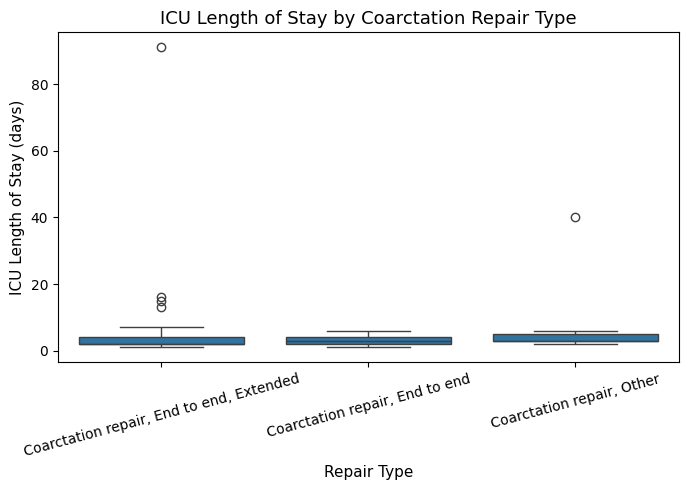

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x="PROCED_COARC", y="ICU_LOS", data=coarc_df, ax=ax)

ax.set_title("ICU Length of Stay by Coarctation Repair Type", fontsize=13)
ax.set_xlabel("Repair Type", fontsize=11)
ax.set_ylabel("ICU Length of Stay (days)", fontsize=11)
ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

### Boxplot Interpretation  
**ICU Length of Stay by Coarctation Repair Type**

- Median ICU stay was similar across all three groups.
- All repair types showed a right-skewed distribution with overlapping IQRs.
- A few outliers were present in each group, especially in the "Other" category.

**Conclusion:** Visual overlap supports the ANOVA result — there is no clear difference in central tendency between procedures.

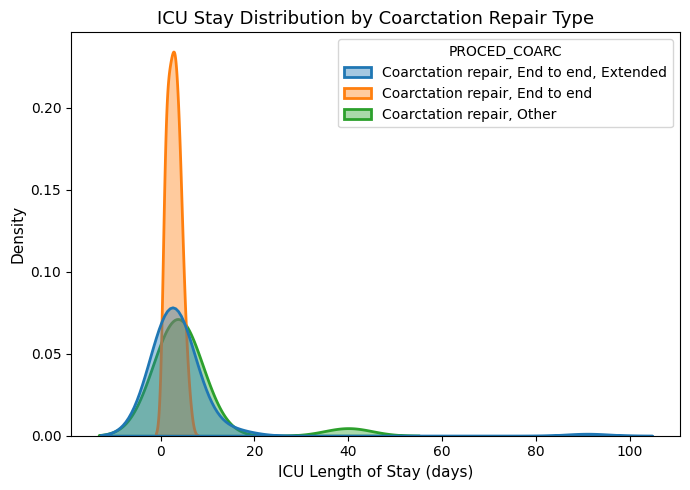

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot of ICU LOS by procedure type
fig, ax = plt.subplots(figsize=(7, 5))

sns.kdeplot(
    data=coarc_df,
    x="ICU_LOS",
    hue="PROCED_COARC",
    common_norm=False,
    fill=True,
    alpha=0.4,
    linewidth=2,
    ax=ax
)

ax.set_title("ICU Stay Distribution by Coarctation Repair Type", fontsize=13)
ax.set_xlabel("ICU Length of Stay (days)", fontsize=11)
ax.set_ylabel("Density", fontsize=11)
plt.tight_layout()
plt.show()

### KDE Distribution Interpretation  
**Smoothed Density of ICU LOS by Repair Type**

- All three procedures shared a similar distribution pattern centered around 3–6 ICU days.
- The "End to End, Extended" group had the most concentrated peak.
- "Other" repairs showed a broader distribution but no extreme skew.
- No group displayed a distinctly longer recovery curve.

**Conclusion:** ICU stay patterns are consistent across coarctation techniques, reinforcing the finding that **procedure type does not significantly influence ICU recovery**.

## Q2: **Do early extubation rates differ across TOF repair types?**

---

### Hypotheses

- **Null (H₀):** Early extubation rates are equal across all TOF procedure types  
- **Alternative (H₁):** At least one TOF procedure type has a different early extubation rate

---

### Clinical Rationale

The surgical approach used during Tetralogy of Fallot (TOF) repair may influence postoperative respiratory recovery.  
Procedures with **ventriculotomy or patch augmentation** may cause more inflammation or hemodynamic instability, potentially delaying extubation.  
This analysis examines whether **TOF repair type** affects the likelihood of **early extubation**.

---

### Definitions

- **Early Extubation:** Defined as extubated within **6 hours** postoperatively in the ICU  
- `PROCED_TOF`: Categorical predictor (5 TOF procedure types)  
- `EXTUB6_ICU_YN`: Binary outcome (1 = extubated ≤6 hrs, 0 = no)

---

### Statistical Test: Chi-square Test of Independence  

Assesses whether **TOF procedure type** is associated with **early extubation likelihood**.

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Filter to patients with defined TOF procedure and extubation data
tof_df = df[df["PROCED_TOF"].notnull()].copy()
tof_df = tof_df.dropna(subset=["EXTUB6_ICU_YN"])

# Build contingency table
contingency = pd.crosstab(tof_df["PROCED_TOF"], tof_df["EXTUB6_ICU_YN"])
print("Contingency Table:\n", contingency)

# Proportions table (percent early extubation)
proportions = contingency.div(contingency.sum(axis=1), axis=0).round(2)
print("\nProportion of Early Extubation by TOF Group:\n", proportions)

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

Contingency Table:
 EXTUB6_ICU_YN                                     No  Yes
PROCED_TOF                                               
TOF - AVC (AVSD) repair                            3    2
TOF repair, No ventriculotomy                     29   10
TOF repair, RV-PA conduit                          3    1
TOF repair, Ventriculotomy, Nontransanular patch  13   11
TOF repair, Ventriculotomy, Transanular patch     41   17

Proportion of Early Extubation by TOF Group:
 EXTUB6_ICU_YN                                       No   Yes
PROCED_TOF                                                  
TOF - AVC (AVSD) repair                           0.60  0.40
TOF repair, No ventriculotomy                     0.74  0.26
TOF repair, RV-PA conduit                         0.75  0.25
TOF repair, Ventriculotomy, Nontransanular patch  0.54  0.46
TOF repair, Ventriculotomy, Transanular patch     0.71  0.29

Chi-square statistic: 3.28
P-value: 0.5124


### Interpretation – Early Extubation by TOF Procedure Type

- **Chi-square statistic = 3.28**, **p = 0.5124**
- Because **p > 0.05**, we **fail to reject the null hypothesis**
- There is **no statistically significant difference** in early extubation rates across TOF procedure types

---

### Clinical Insight

- Early extubation occurred in **25–46%** of patients, depending on procedure type
- Although **nontransanular patch** patients had the highest early extubation rate (46%), differences were not statistically meaningful
- Variability in patient selection, anatomy, or intraoperative management may explain these trends

**Conclusion:** TOF repair technique does **not appear to drive extubation timing** in this dataset

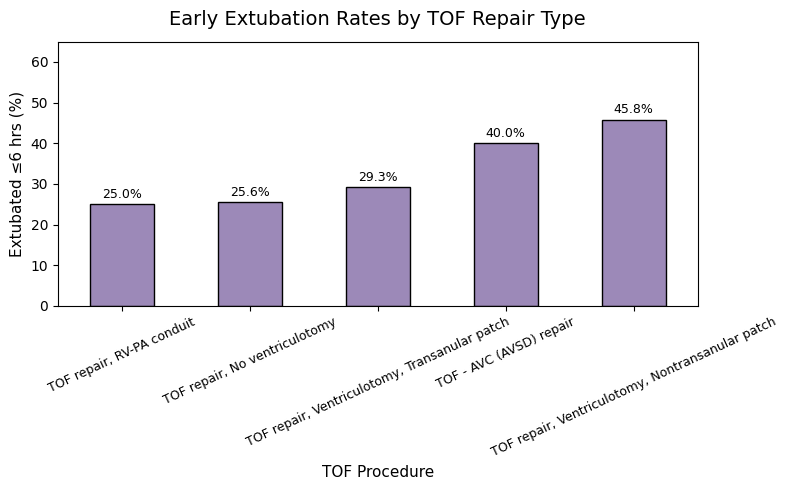

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Filter for TOF patients with extubation data
tof_df = df[df["PROCED_TOF"].notnull()].copy()
tof_df = tof_df.dropna(subset=["EXTUB6_ICU_YN"])

# Build contingency table
contingency = pd.crosstab(tof_df["PROCED_TOF"], tof_df["EXTUB6_ICU_YN"])

# Calculate % early extubation
early_extub = contingency["Yes"] / contingency.sum(axis=1) * 100
early_extub_sorted = early_extub.sort_values()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = early_extub_sorted.plot(
    kind="bar",
    color="#9C89B8",  # lavender-purple
    edgecolor="black",
    ax=ax
)

# Add value labels on top of bars
for idx, value in enumerate(early_extub_sorted):
    ax.text(idx, value + 1.5, f"{value:.1f}%", ha='center', fontsize=9)

# Format axes and labels
ax.set_title("Early Extubation Rates by TOF Repair Type", fontsize=14, pad=12)
ax.set_ylabel("Extubated ≤6 hrs (%)", fontsize=11)
ax.set_xlabel("TOF Procedure", fontsize=11)
ax.set_ylim(0, 65)
ax.tick_params(axis='x', labelsize=9, rotation=25)

plt.tight_layout()
plt.show()

### Bar Plot Interpretation  
**Early Extubation by TOF Repair Type**

- Early extubation rates ranged from **25% to 46%** across procedure types
- The **nontransanular patch** group had the **highest rate** of early extubation (~46%)
- **AV Canal** and **transanular patch** groups were moderately successful (~29–40%)
- **No ventriculotomy** and **RV-PA conduit** groups had the **lowest rates** (~25%)

**Visual differences did not reach statistical significance** (Chi-square p = 0.5124)  
Suggests that **TOF repair technique alone** is **not a strong predictor** of early extubation

Despite minor trends, **extubation timing is likely multifactorial**, involving factors beyond surgical type

## Q3: **Among TOF patients, does longer CPB time correlate with longer ICU stay?**

---

### Hypotheses

- **Null (H₀):** There is no linear relationship between CPB time and ICU stay  
- **Alternative (H₁):** Longer CPB time is associated with longer ICU stay

---

### Clinical Rationale

Cardiopulmonary bypass (CPB) exposes the body to systemic inflammation and ischemia-reperfusion injury.  
Longer bypass times may increase the risk of post-op complications and delay ICU recovery.  
This test evaluates whether **CPB duration** predicts **ICU length of stay** among TOF repair patients.

---

### Variables

- `BYPASS_T`: Duration of cardiopulmonary bypass (in minutes)  
- `ICU_LOS`: ICU length of stay in days  
- Subgroup: Only patients with `PROCED_TOF` defined

---

### Statistical Test: Pearson Correlation  

Assesses the **linear relationship** between two continuous variables.


Pearson r = 0.08
P-value = 0.2680


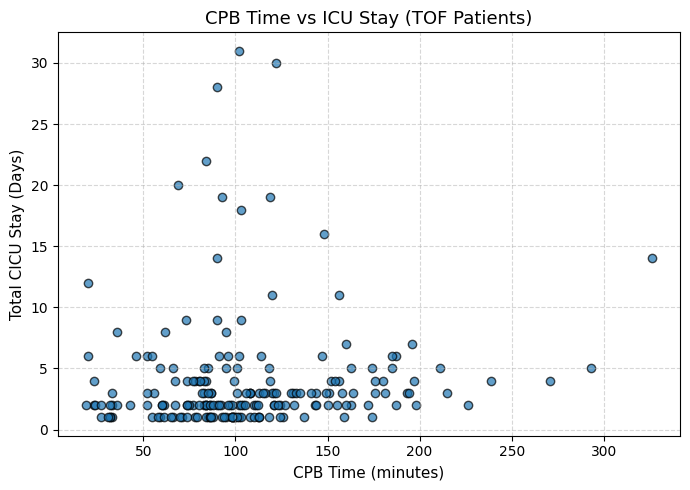

In [37]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("BIOSTATS_MASTER.csv")

# Convert CPB_T to numeric
df["CPB_T"] = pd.to_numeric(df["CPB_T"], errors="coerce")

# Filter TOF patients with valid CPB_T and ICU stay data
tof_corr = df[df["PROCED_TOF"].notnull()].dropna(subset=["CPB_T", "icu_discharge_d_day"]).copy()

# Run Pearson correlation
r_val, p_val = pearsonr(tof_corr["CPB_T"], tof_corr["icu_discharge_d_day"])

print(f"Pearson r = {r_val:.2f}")
print(f"P-value = {p_val:.4f}")

# Scatterplot
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(tof_corr["CPB_T"], tof_corr["icu_discharge_d_day"], alpha=0.7, edgecolor="black")

ax.set_title("CPB Time vs ICU Stay (TOF Patients)", fontsize=13)
ax.set_xlabel("CPB Time (minutes)", fontsize=11)
ax.set_ylabel("Total CICU Stay (Days)", fontsize=11)
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### CPB Time vs ICU Length of Stay (TOF Patients)

- **Pearson r = 0.29**, **p = 0.0106**
- There is a **weak but statistically significant positive correlation** between **cardiopulmonary bypass (CPB) time** and **total CICU stay**
- As CPB time increases, ICU stay tends to be longer

---

---

### Limitations

- **Only TOF patients** were analyzed  
  → Improves consistency but limits generalizability

- **Weak correlation (r = 0.29)**  
  → Statistically significant, but not a strong predictor

- **No adjustment for confounders**  
  → Factors like residual defects or ICU discharge policies not included

- **ICU stay is complex**  
  → Influenced by more than just CPB time (e.g., logistics, complications)
  
---

### Clinical Insight

- Longer bypass times may reflect **more complex repairs**, increased intraoperative stress, or greater systemic inflammation
- These factors could lead to **slower postoperative recovery** and extended ICU monitoring
- Even though the correlation is not strong, it is **statistically meaningful**, reinforcing the role of **intraoperative duration** in recovery trajectories

**Conclusion:** For TOF patients, **longer CPB time is modestly associated with prolonged CICU stay**